# Mortality Classification Model Analysis

### This is a Mortality dataset downloaded from Kaggle. It is a prediction model of in-hospital mortality in intensive care unit patients with heart failure. The purpose of this project was aimed to build a prediction model and a predictive system to predict whether a patient is a survivor or non survivor. The end goal of this project was achieved.

# Importing the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data collection and processing

In [5]:
# Loading the dataset to pandas dataframe

Mortality_data = pd.read_csv("C:\\Users\\LENOVO USER\\Downloads\\data01.csv")

In [6]:
# Let's preview the first five rows of this data

Mortality_data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [7]:
# Let's preview the last five rows of this data

Mortality_data.tail()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25
1176,2,107636,0.0,47,1,23.121384,1,0,0,1,...,135.285714,9.085714,93.857143,20.285714,2.566667,NaN,26.571429,NaN,NaN,55


In [8]:
# Let's preview the number of rows and columns of the data

Mortality_data.shape

(1177, 51)

In [9]:
# Let's get the information about the data we are using for this analysis

Mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [10]:
# Let's the check column features of this data

Mortality_data.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [11]:
# Let's check if there are any duplicates in this data

print(Mortality_data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1172    False
1173    False
1174    False
1175    False
1176    False
Length: 1177, dtype: bool


In [12]:
# Let's check the number of missing values in this data

Mortality_data.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

# Handling missing values

### Mean..... Average value

### Mode...... Most repeated value

In [13]:
# Let's find the mode value of 'outcome' column

Mortality_data['outcome'].mode()

0    0.0
Name: outcome, dtype: float64

In [14]:
# Filling the missing values in 'outcome' column with 'Mode' value

Mortality_data['outcome'].fillna(Mortality_data['outcome'].mode()[0], inplace = True)

In [15]:
# Let's see if there's still missing values in the 'outcome' column

Mortality_data.isnull().sum()

group                         0
ID                            0
outcome                       0
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [16]:
# Let's convert the 'outcome' datatype to integer

Mortality_data['outcome'] = Mortality_data['outcome'].astype('int')

In [17]:
# Let's check the information of our data to see if the 'outcome' datatype was successfully changed to integer

Mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1177 non-null   int32  
 3   age                       1177 non-null   int64  
 4   gendera                   1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [18]:
# Let's preview the first five rows of our data

Mortality_data.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [19]:
# Let's preview the last five rows of our data

Mortality_data.tail()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1172,2,171130,0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25
1176,2,107636,0,47,1,23.121384,1,0,0,1,...,135.285714,9.085714,93.857143,20.285714,2.566667,NaN,26.571429,NaN,NaN,55


In [20]:
# Let's find the mean value of 'BMI' column

Mortality_data['BMI'].mean()

30.18827765159043

In [21]:
# Filling the missing values in 'BMI' column with 'Mean' value

Mortality_data['BMI'].fillna(Mortality_data['BMI'].mean(), inplace = True)

In [22]:
# Let's find the mean value of 'heart rate' column

Mortality_data['heart rate'].mean()

84.57584840750846

In [23]:
# Filling the missing values in 'heart rate' column with 'Mean' value

Mortality_data['heart rate'].fillna(Mortality_data['heart rate'].mean(), inplace = True)

In [24]:
# Let's find the mean value of 'Systolic blood pressure' column

Mortality_data['Systolic blood pressure'].mean()

117.99503522048246

In [25]:
# Filling the missing values in 'Systolic blood pressure' column with 'Mean' value

Mortality_data['Systolic blood pressure'].fillna(Mortality_data['Systolic blood pressure'].mean(), inplace = True)

In [26]:
# Let's find the mean value of 'Diastolic blood pressure' column

Mortality_data['Diastolic blood pressure'].mean()

59.53449655225665

In [27]:
# Filling the missing values in 'Diastolic blood pressure' column with 'Mean' value

Mortality_data['Diastolic blood pressure'].fillna(Mortality_data['Diastolic blood pressure'].mean(), inplace = True)

In [28]:
# Let's find the mean value of 'Respiratory rate' column

Mortality_data['Respiratory rate'].mean()

20.801511481503425

In [29]:
# Filling the missing values in 'Respiratory rate' column with 'Mean' value

Mortality_data['Respiratory rate'].fillna(Mortality_data['Respiratory rate'].mean(), inplace = True)

In [30]:
# Let's find the mean value of 'temperature' column

Mortality_data['temperature'].mean()

36.67728595220208

In [31]:
# Filling the missing values in 'temperature' column with 'Mean' value

Mortality_data['temperature'].fillna(Mortality_data['temperature'].mean(), inplace = True)

In [32]:
# Let's find the mean value of 'SP O2' column

Mortality_data['SP O2'].mean()

96.27290043504303

In [33]:
# Filling the missing values in 'SP 02' column with 'Mean' value

Mortality_data['SP O2'].fillna(Mortality_data['SP O2'].mean(), inplace = True)

In [34]:
# Let's find the mean value of 'Urine output' column

Mortality_data['Urine output'].mean()

1899.2765118317266

In [35]:
# Filling the missing values in 'Urine output' column with 'Mean' value

Mortality_data['Urine output'].fillna(Mortality_data['Urine output'].mean(), inplace = True)

In [36]:
# Let's find the mean value of 'Neutrophils' column

Mortality_data['Neutrophils'].mean()

80.11354430419172

In [37]:
# Filling the missing values in 'Neutrophils' column with 'Mean' value

Mortality_data['Neutrophils'].fillna(Mortality_data['Neutrophils'].mean(), inplace = True)

In [38]:
# Let's find the mean value of 'Basophils' column

Mortality_data['Basophils'].mean()

0.4055694314716784

In [39]:
# Filling the missing values in 'Basophils' column with 'Mean' value

Mortality_data['Basophils'].fillna(Mortality_data['Basophils'].mean(), inplace = True)

In [40]:
# Let's find the mean value of 'Lymphocyte' column

Mortality_data['Lymphocyte'].mean()

12.233024294061039

In [41]:
# Filling the missing values in 'Lymphocyte' column with 'Mean' value

Mortality_data['Lymphocyte'].fillna(Mortality_data['Lymphocyte'].mean(), inplace = True)

In [42]:
# Let's find the mean value of 'PT' column

Mortality_data['PT'].mean()

17.481057149161625

In [43]:
# Filling the missing values in 'PT' column with 'Mean' value

Mortality_data['PT'].fillna(Mortality_data['PT'].mean(), inplace = True)

In [44]:
# Let's find the mean value of 'INR' column

Mortality_data['INR'].mean()

1.625464983596369

In [45]:
# Filling the missing values in 'INR' column with 'Mean' value

Mortality_data['INR'].fillna(Mortality_data['INR'].mean(), inplace = True)

In [46]:
# Let's find the mean value of 'Creatine kinase' column

Mortality_data['Creatine kinase'].mean()

246.7784560746935

In [47]:
# Filling the missing values in 'Creatine kinase' column with 'Mean' value

Mortality_data['Creatine kinase'].fillna(Mortality_data['Creatine kinase'].mean(), inplace = True)

In [48]:
# Let's find the mean value of 'glucose' column

Mortality_data['glucose'].mean()

148.79653094522868

In [49]:
# Filling the missing values in 'glucose' column with 'Mean' value

Mortality_data['glucose'].fillna(Mortality_data['glucose'].mean(), inplace = True)

In [50]:
# Let's find the mean value of 'Blood calcium' column

Mortality_data['Blood calcium'].mean()

8.500894160843536

In [51]:
# Filling the missing values in 'Blood calcium' column with 'Mean' value

Mortality_data['Blood calcium'].fillna(Mortality_data['Blood calcium'].mean(), inplace = True)

In [52]:
# Let's find the mean value of 'PH' column

Mortality_data['PH'].mean()

7.378532073776262

In [53]:
# Filling the missing values in 'PH' column with 'Mean' value

Mortality_data['PH'].fillna(Mortality_data['PH'].mean(), inplace = True)

In [54]:
# Let's find the mean value of 'Lactic acid' column

Mortality_data['Lactic acid'].mean()

1.8534255697974666

In [55]:
# Filling the missing values in 'Lactic acid' column with 'Mean' value

Mortality_data['Lactic acid'].fillna(Mortality_data['Lactic acid'].mean(), inplace = True)

In [56]:
# Let's find the mean value of 'PCO2' column

Mortality_data['PCO2'].mean()

45.53538235441683

In [57]:
# Filling the missing values in 'PCO2' column with 'Mean' value

Mortality_data['PCO2'].fillna(Mortality_data['PCO2'].mean(), inplace = True)

In [58]:
# Let's checK if there are missing values in this data after filling it with mean values

Mortality_data.isnull().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [59]:
# Let's still check the number of rows and columns of the data

Mortality_data.shape

(1177, 51)

# Data Analysis

In [60]:
# Let's get the statistical measures of our data

Mortality_data.describe()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,...,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000
mean,1.299065,150778.120646,0.135089,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,...,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.341964,13.434061,0.499584,8.430500,0.450200,0.497819,0.280204,0.493995,...,4.151347,0.572019,5.339733,2.652732,0.251532,0.058367,5.167512,0.882849,11.008284,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,...,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,25.276974,0.000000,0.000000,0.000000,0.000000,...,136.666667,8.150000,99.000000,12.250000,1.955556,7.350000,23.454545,1.300000,39.000000,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,30.188278,1.000000,0.000000,0.000000,0.000000,...,139.250000,8.500000,102.500000,13.666667,2.092308,7.378532,26.500000,1.833333,45.535382,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,32.101349,1.000000,1.000000,0.000000,1.000000,...,141.600000,8.868750,105.571429,15.416667,2.241667,7.410000,29.875000,2.000000,47.272727,55.000000
max,2.000000,199952.000000,1.000000,99.000000,2.000000,104.970366,1.000000,1.000000,1.000000,1.000000,...,154.736842,10.950000,122.526316,25.500000,4.072727,7.580000,47.666667,8.333333,98.600000,75.000000


# Numerical Features

In [61]:
sns.set()

<Figure size 432x432 with 0 Axes>

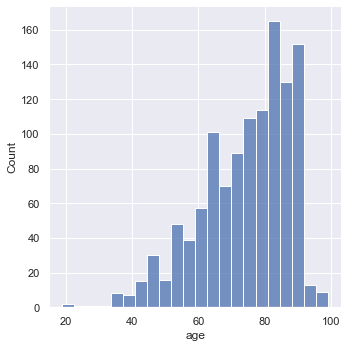

In [62]:
# Let's create a distribution plot for 'age' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['age'])
plt.show()

### There are more values distributed between 60-80 age range.

<Figure size 432x432 with 0 Axes>

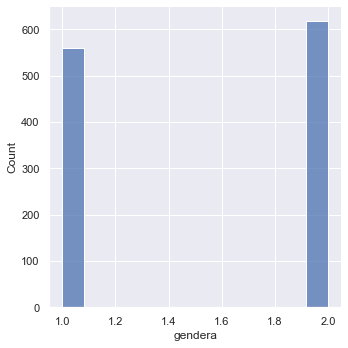

In [63]:
# Let's create a distribution plot for 'gendera' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['gendera'])
plt.show()

<Figure size 432x432 with 0 Axes>

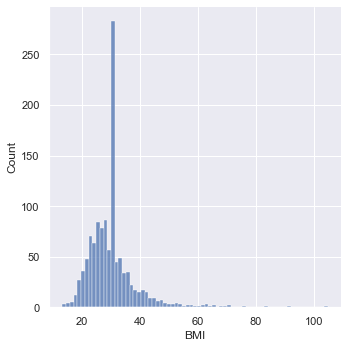

In [64]:
# Let's create a distribution plot for 'BMI' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['BMI'])
plt.show()

<Figure size 432x432 with 0 Axes>

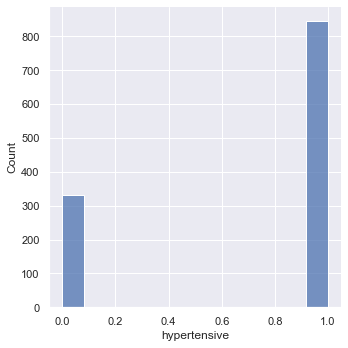

In [65]:
# Let's create a distribution plot for 'hypertensive' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['hypertensive'])
plt.show()

<Figure size 432x432 with 0 Axes>

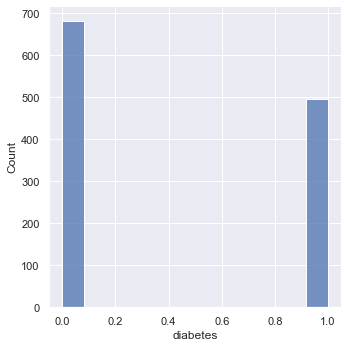

In [66]:
# Let's create a distribution plot for 'diabetes' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['diabetes'])
plt.show()

<Figure size 432x432 with 0 Axes>

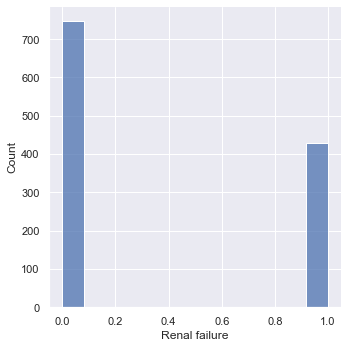

In [67]:
# Let's create a distribution plot for 'Renal failure' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['Renal failure'])
plt.show()

<Figure size 432x432 with 0 Axes>

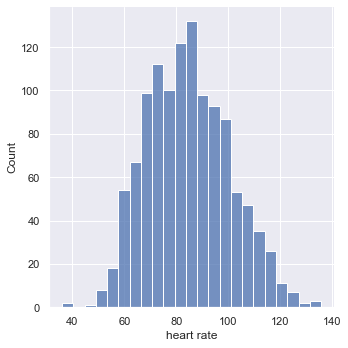

In [68]:
# Let's create a distribution plot for 'heart rate' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['heart rate'])
plt.show()

<Figure size 432x432 with 0 Axes>

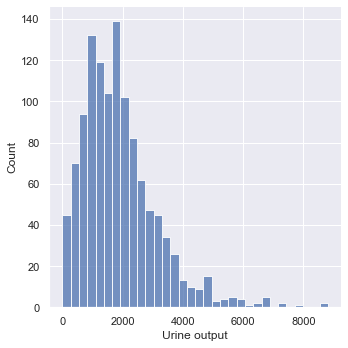

In [69]:
# Let's create a distribution plot for 'Urine output' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['Urine output'])
plt.show()

<Figure size 432x432 with 0 Axes>

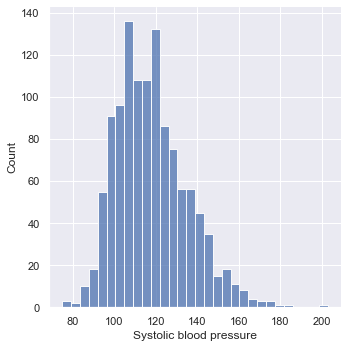

In [70]:
# Let's create a distribution plot for 'Systolic blood pressure' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['Systolic blood pressure'])
plt.show()

<Figure size 432x432 with 0 Axes>

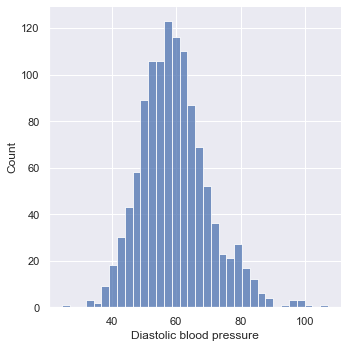

In [71]:
# Let's create a distribution plot for 'Diastolic blood pressure' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['Diastolic blood pressure'])
plt.show()

<Figure size 432x432 with 0 Axes>

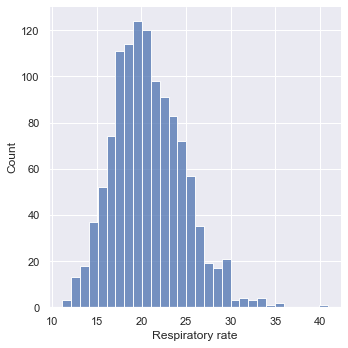

In [72]:
# Let's create a distribution plot for 'Respiratory rate' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['Respiratory rate'])
plt.show()

<Figure size 432x432 with 0 Axes>

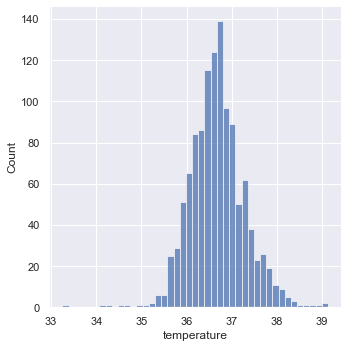

In [73]:
# Let's create a distribution plot for 'temperature' numerical feature

plt.figure(figsize = (6,6))
sns.displot(Mortality_data['temperature'])
plt.show()

In [74]:
# Let's check the distribution of the Outcome variable

Mortality_data['outcome'].value_counts()

0    1018
1     159
Name: outcome, dtype: int64

### 0--------> Survivor

### 1..........> Non Survivor

# Splitting the Features and Target

In [75]:
# Before splitting the features and target variable, let's drop the features that won't be needed for our prediction

Mortality_data.drop('group', axis = 1, inplace = True)

In [76]:
Mortality_data.drop('ID', axis = 1, inplace = True)

In [77]:
# Let's view our data

Mortality_data.head()

,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,0,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,0,75,2,30.188278,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,0,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,0,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,0,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [80]:
X = Mortality_data.drop(columns = 'outcome', axis = 1)
Y = Mortality_data['outcome']

In [81]:
# Let's print X

print(X)

      age  gendera        BMI  hypertensive  atrialfibrillation  \
0      72        1  37.588179             0                   0   
1      75        2  30.188278             0                   0   
2      83        2  26.572634             0                   0   
3      43        2  83.264629             0                   0   
4      75        2  31.824842             1                   0   
...   ...      ...        ...           ...                 ...   
1172   62        1  25.516870             1                   1   
1173   78        1  25.822710             0                   1   
1174   85        2  23.891779             1                   1   
1175   79        2  35.288554             0                   0   
1176   47        1  23.121384             1                   0   

      CHD with no MI  diabetes  deficiencyanemias  depression  Hyperlipemia  \
0                  0         1                  1           0             1   
1                  0         0       

In [82]:
# Let's print Y

print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1172    0
1173    0
1174    0
1175    0
1176    0
Name: outcome, Length: 1177, dtype: int32


# Training the data into Training Data and Test Data

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [96]:
# Let's check the number of training and test data we have

print(X.shape, X_train.shape, X_test.shape)

(1177, 48) (941, 48) (236, 48)


# Model Training..........> Logistic Regression

In [97]:
model = LogisticRegression()

In [98]:
# Training the LogisticRegression model with Training data

model.fit(X_train, Y_train)

C:\Users\LENOVO USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

### Accuracy Score

In [99]:
# Accuracy on training data

X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [100]:
print('Accuracy on Training data : ', training_data_accuracy )

Accuracy on Training data :  0.8799149840595112


### This is a good accuracy score which means out of 100 predictions our model can predict correctly for 88 values.

In [101]:
# Accuracy on testing data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [102]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8601694915254238


# Building a Predictive System

In [103]:
input_data = (72,1,39.66742627,1,0,0,0,0,0,1,1,1,69.63636364,106.5652174,47.82608696,19.14814815,35.6031746,95.63636364,2450,28.9375,3.72,24.3375,31.3125,77.875,17.4,7.975,140.25,80.7,0.2,13.45,14,1.2,29683,108.25,2.96,109.1333333,105.6,4.606666667,144.1333333,8.775,106.6666667,15.2,1.875,7.169230769,26.8,0.625,69.76923077,55)

# let's change the input data to a numpy arrary
input_data_as_numpy_arrary = np.asarray(input_data)

# Let's reshape the numpy arrary as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_arrary.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\LENOVO USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### We can see our model predicted [0] which means the patient suffering heart failure is a survivor.